In [ ]:
# 导入必要包

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_olivetti_faces
from torch.utils.data import DataLoader  # 数据加载器
from sklearn.model_selection import train_test_split



In [174]:
# 定义超参数
LR = 1e-3
epochs = 20
BATCH_SIZE = 32

In [175]:
# 数据集加载
olivetti_faces = fetch_olivetti_faces(data_home='./fetth_olivetti_faces_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


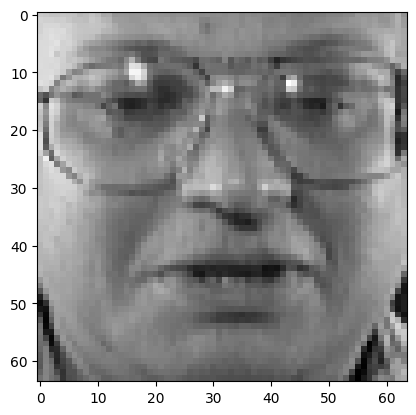

In [176]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [177]:
images = torch.tensor(olivetti_faces.data, dtype=torch.float32)
targets = torch.tensor(olivetti_faces.target,dtype=torch.long)

# 划分训练集和测试集
train_images, test_images, train_targets, test_targets = train_test_split(
    images, targets, test_size=0.2, random_state=42
)

# 创建训练集和测试集的 DataLoader
train_dataset = [(img, lbl) for img, lbl in zip(train_images, train_targets)]
test_dataset = [(img, lbl) for img, lbl in zip(test_images, test_targets)]

trian_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [178]:
# 定义模型
from torch_nn_02 import TorchNN
model = TorchNN()
print(model)

TorchNN(
  (linear1): Linear(in_features=4096, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=1024, out_features=512, bias=True)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=512, out_features=512, bias=True)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=512, out_features=128, bias=True)
  (bn5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear6): Linear(in_features=128, out_features=40, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (act): ReLU()
)


In [179]:
# 定义损失函数
loss_fn = nn.CrossEntropyLoss()
# 定义优化器
### 使用 AdamW 优化器
### 使用sgd 训练速度提升，但是准确李下降
### 使用 Adam 优化器 训练速度提升一点， 但是准确率下降一点点但是和 AdamW 相差不多
optim = optim.AdamW(model.parameters(), lr=LR)


In [180]:
model.train()
# 训练模型
### 未加 Dropout 训练速度 2.0S 左右  
### 加上Dropout 训练速度 2.0S  
### 增加隐藏层之后 训练速度9s左右
### 使用sgd 优化器之后  执行速度 4s 准确率下架
for epoch in range(epochs):
  for data,target in trian_dl:
    out = model(data.reshape(-1,64*64))
    loss = loss_fn(out, target.long())
    model.zero_grad()
    loss.backward()
    optim.step()
# 测试模型
  print(f'Epoch:{epoch} Loss: {loss.item()}')
    

Epoch:0 Loss: 3.1451711654663086
Epoch:1 Loss: 2.5128402709960938
Epoch:2 Loss: 1.9184142351150513
Epoch:3 Loss: 1.6772565841674805
Epoch:4 Loss: 1.3218175172805786
Epoch:5 Loss: 0.985535740852356
Epoch:6 Loss: 0.6412800550460815
Epoch:7 Loss: 0.5726368427276611
Epoch:8 Loss: 0.39044681191444397
Epoch:9 Loss: 0.36700859665870667
Epoch:10 Loss: 0.39196282625198364
Epoch:11 Loss: 0.22740109264850616
Epoch:12 Loss: 0.3344111144542694
Epoch:13 Loss: 0.18448065221309662
Epoch:14 Loss: 0.12268303334712982
Epoch:15 Loss: 0.17254707217216492
Epoch:16 Loss: 0.18875151872634888
Epoch:17 Loss: 0.13069769740104675
Epoch:18 Loss: 0.10566042363643646
Epoch:19 Loss: 0.07927833497524261


In [181]:

# 测试
#test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

correct = 0
total = 0
### 未加 Dropout 训练准确度 95% 
##  未加 Dropout 训练准确度 经过多次训练 并没有比未加 Dropout 准确度高，95% 

## 在原四个隐藏层基础添加2个隐藏层 训练速速增加近一倍  准确率倒是没有什么变化  修改优化器
### 使用 sgd 优化器  训练速度 4s  准确率下降到60% 左右
model.eval()
with torch.no_grad():
  for data,target in test_dl:
    out = model(data.reshape(-1,64*64))
    pred = torch.argmax(out, dim=1)
    total += target.size(0)  # size(0) 等效 shape[0]
    correct += (pred == target).sum().item()
    
    print(pred,target)


print(f'Accuracy: {correct/total*100}%')

tensor([39, 26, 22,  6,  0, 30, 36, 19, 27,  2, 21, 36,  5,  6,  6,  0, 29, 16,
        21,  7, 30,  5,  0, 37, 13, 19, 36,  7,  1, 28, 32,  2]) tensor([39, 26, 22,  6,  0, 30, 36, 19, 27,  2, 21, 36,  5,  6,  6,  0, 29, 16,
        21,  7, 30,  5,  0, 37, 13, 19, 36,  7,  1, 28, 32,  2])
tensor([30,  1, 38, 25,  2, 27, 19, 18, 22, 31, 36, 31,  5, 19, 23,  7, 12, 39,
        37, 35, 35,  0, 33, 39,  1, 20, 17, 28, 37, 30, 20, 36]) tensor([30,  1, 38, 25,  2, 27, 19, 18,  3, 31, 36, 31,  5, 19, 23,  7, 12, 39,
        37, 35, 35,  0, 33, 39,  1, 20, 17, 28, 37, 30, 20, 36])
tensor([ 6, 30, 15,  7, 25,  2, 13, 16,  6,  5, 24, 11, 37, 19, 10, 14]) tensor([ 6, 30, 15,  7, 25,  2, 13, 16,  6,  5, 24, 11, 39, 19, 10, 31])
Accuracy: 96.25%
